In [117]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv("synthetic_data_withnoise.csv")

In [119]:
print("\033[1m"+"Ientifying missing values"+"\033[0m")
missing=df.isna().sum()
print(missing)

Ientifying missing values
Age                                259
Customer_Type                        0
Gender                               0
Location                             0
Income                             458
Occupation                           0
Type_of_Profession                 500
Credit_Score                         0
Number_of_Products                   0
Tenure_of_Association                0
Cheque_Bounce_Indicator              0
Min_Avg_Balance                      0
Last_FY_Credit                       0
Last_Account_Opened                  0
Account_Nature                       0
prd                                  0
Balance                              0
Security_Amount                      0
Loan_Repayment_Amount                0
Rate_of_Interest                     0
Limit_Expired                        0
Stock_Statement_Expiry_Date_Due      0
Loan_Disbursed_Amount                0
Restructured_Flag                    0
NEG_MAB_CORR                         0

In [ ]:
df['Type_of_Profession']=df["Type_of_Profession"].fillna('Others')

In [120]:
df['Income']=df["Income"].fillna(df.groupby(['Customer_Type','Type_of_Profession'])['Income'].transform('median'))
df['AVG_WDL']=df["AVG_WDL"].fillna(df.groupby(['Customer_Type','Type_of_Profession'])['AVG_WDL'].transform('median'))
df['Age']=df["Age"].fillna(df.groupby(['Customer_Type','Type_of_Profession'])['Age'].transform('median'))

In [121]:
print("\033[1m"+"After Handling Missing Values"+"\033[0m")
missing=df.isna().sum()
print(missing)


After Handling Missing Values
Age                                259
Customer_Type                        0
Gender                               0
Location                             0
Income                             458
Occupation                           0
Type_of_Profession                 500
Credit_Score                         0
Number_of_Products                   0
Tenure_of_Association                0
Cheque_Bounce_Indicator              0
Min_Avg_Balance                      0
Last_FY_Credit                       0
Last_Account_Opened                  0
Account_Nature                       0
prd                                  0
Balance                              0
Security_Amount                      0
Loan_Repayment_Amount                0
Rate_of_Interest                     0
Limit_Expired                        0
Stock_Statement_Expiry_Date_Due      0
Loan_Disbursed_Amount                0
Restructured_Flag                    0
NEG_MAB_CORR                      

In [65]:
print("\033[1m"+"Checking FOr outliers"+"\033[0m")

df.describe()

Checking FOr outliers


,Age,Income,Credit_Score,Number_of_Products,Tenure_of_Association,Min_Avg_Balance,Last_FY_Credit,Last_Account_Opened,Balance,Security_Amount,...,NEG_MAB_CORR,MAB_CORR,SMA_DAYS,NPA_TO_STD,STD_TO_NPA,BOUNCE_RATE,AVG_WDL,Inflation_Rate,Benchmark_Lending_Rate,Unemployment_Rate
count,300500.000000,3.005000e+05,300500.000000,300500.000000,300500.000000,3.005000e+05,3.005000e+05,300500.000000,3.005000e+05,3.005000e+05,...,300500.000000,300500.000000,300500.000000,300500.000000,300500.000000,300500.000000,300500.000000,300500.000000,300500.000000,300500.000000
mean,44.019839,5.131442e+05,575.463757,4.996795,14.966375,2.544133e+05,2.493904e+06,1821.123170,2.902650e+05,2.498292e+07,...,0.499941,0.499431,181.892493,1.503038,1.497594,0.499960,101081.241404,0.499175,0.501624,0.501913
std,15.088529,3.633853e+05,158.767337,2.586030,8.664526,1.828485e+05,1.443588e+06,1053.292493,1.132578e+06,1.444200e+07,...,0.288622,0.288499,105.347055,1.119165,1.118021,0.289028,60742.163819,0.500000,0.499998,0.499997
min,0.563457,3.673438e+03,300.001935,1.000000,0.000018,6.695461e-01,1.961282e+00,0.001341,5.011254e+02,1.275004e+03,...,0.000002,0.000004,0.000000,0.000000,0.000000,0.000001,340.862472,0.000000,0.000000,0.000000
25%,30.936939,2.587210e+05,437.888330,3.000000,7.470750,1.256072e+05,1.245172e+06,909.531981,1.255317e+05,1.245816e+07,...,0.250457,0.249845,91.000000,1.000000,0.000000,0.249653,50588.281937,0.000000,0.000000,0.000000
50%,44.044485,5.063255e+05,575.715765,5.000000,14.958781,2.509435e+05,2.491619e+06,1817.066719,2.507159e+05,2.494034e+07,...,0.499952,0.499998,182.000000,2.000000,1.000000,0.499567,100664.737703,0.000000,1.000000,1.000000
75%,57.038027,7.535667e+05,713.009581,7.000000,22.486957,3.756104e+05,3.740904e+06,2734.008724,3.758173e+05,3.748880e+07,...,0.749619,0.748500,273.000000,3.000000,2.000000,0.750381,150285.617833,1.000000,1.000000,1.000000
max,119.861641,9.985266e+06,849.999670,9.000000,29.999909,4.980685e+06,4.999996e+06,3649.996598,4.982780e+07,4.999991e+07,...,1.000000,0.999992,364.000000,3.000000,3.000000,0.999993,994686.386661,1.000000,1.000000,1.000000


In [66]:
#Identifying and Dropping of outliers

Q1=df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_age=df[(df['Age']<Q1 - threshold*IQR)|(df['Age']>Q3+threshold*IQR)]

In [67]:
df=df.drop(outliers_age.index)

In [68]:
Q1=df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_income=df[(df['Income']<Q1 - threshold*IQR)|(df['Income']>Q3+threshold*IQR)]

In [69]:
df=df.drop(outliers_income.index)

In [70]:
Q1=df['Min_Avg_Balance'].quantile(0.25)
Q3 = df['Min_Avg_Balance'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_min_avg_bal=df[(df['Min_Avg_Balance']<Q1 - threshold*IQR)|(df['Min_Avg_Balance']>Q3+threshold*IQR)]

In [71]:
df=df.drop(outliers_min_avg_bal.index)

In [72]:
Q1=df['Last_FY_Credit'].quantile(0.25)
Q3 = df['Last_FY_Credit'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_last_credit=df[(df['Last_FY_Credit']<Q1 - threshold*IQR)|(df['Last_FY_Credit']>Q3+threshold*IQR)]

In [73]:
df=df.drop(outliers_last_credit.index)

In [74]:
Q1=df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_bal=df[(df['Balance']<Q1 - threshold*IQR)|(df['Balance']>Q3+threshold*IQR)]

In [75]:
df=df.drop(outliers_bal.index)

In [76]:
Q1=df['Loan_Repayment_Amount'].quantile(0.25)
Q3 = df['Loan_Repayment_Amount'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_loan_repay_amt=df[(df['Loan_Repayment_Amount']<Q1 - threshold*IQR)|(df['Loan_Repayment_Amount']>Q3+threshold*IQR)]

In [77]:
df=df.drop(outliers_loan_repay_amt.index)

In [78]:
Q1=df['AVG_WDL'].quantile(0.25)
Q3 = df['AVG_WDL'].quantile(0.75)
IQR = Q3-Q1
threshold =1
outliers_avg_wdl=df[(df['AVG_WDL']<Q1 - threshold*IQR)|(df['AVG_WDL']>Q3+threshold*IQR)]

In [79]:
df=df.drop(outliers_avg_wdl.index)

In [80]:
print("\033[1m"+"After Removing Outliers"+"\033[0m")

df.describe()

After Removing Outliers


,Age,Income,Credit_Score,Number_of_Products,Tenure_of_Association,Min_Avg_Balance,Last_FY_Credit,Last_Account_Opened,Balance,Security_Amount,...,NEG_MAB_CORR,MAB_CORR,SMA_DAYS,NPA_TO_STD,STD_TO_NPA,BOUNCE_RATE,AVG_WDL,Inflation_Rate,Benchmark_Lending_Rate,Unemployment_Rate
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,3.000000e+05,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000
mean,43.993886,505372.734654,575.458995,4.996717,14.966893,250305.292732,2.498060e+06,1821.087660,250280.319317,2.498399e+07,...,0.499953,0.499447,181.889427,1.503060,1.497493,0.499964,100438.414997,0.49915,0.501653,0.501890
std,15.019970,285639.277422,158.771635,2.585898,8.664566,144108.106863,1.441194e+06,1053.294275,144364.460942,1.444218e+07,...,0.288631,0.288504,105.351120,1.119173,1.117976,0.289040,57469.288172,0.50000,0.499998,0.499997
min,18.000153,10001.408082,300.001935,1.000000,0.000018,0.669546,1.030000e+03,0.001341,501.125387,1.275004e+03,...,0.000002,0.000004,0.000000,0.000000,0.000000,0.000001,1000.278135,0.00000,0.000000,0.000000
25%,30.939121,258288.365334,437.871321,3.000000,7.470975,125402.878047,1.251864e+06,909.456093,125303.919109,1.245927e+07,...,0.250451,0.249859,91.000000,1.000000,0.000000,0.249659,50524.574367,0.00000,0.000000,0.000000
50%,44.033675,505597.222886,575.720344,5.000000,14.960100,250536.113010,2.495727e+06,1817.038210,250277.673335,2.494032e+07,...,0.499965,0.500030,182.000000,2.000000,1.000000,0.499577,100526.523714,0.00000,1.000000,1.000000
75%,57.016605,752493.372560,713.007265,7.000000,22.487244,374990.288393,3.742941e+06,2733.970640,375170.922574,3.749060e+07,...,0.749667,0.748516,273.000000,3.000000,2.000000,0.750420,150107.117961,1.00000,1.000000,1.000000
max,69.999949,999996.867943,849.999670,9.000000,29.999909,499997.413507,4.999996e+06,3649.996598,499999.022569,4.999991e+07,...,1.000000,0.999992,364.000000,3.000000,3.000000,0.999993,199999.519852,1.00000,1.000000,1.000000


In [81]:
print("\033[1m"+"Standardizing Data"+"\033[0m")

df_x = df[['Age','Income','Credit_Score','Number_of_Products','Tenure_of_Association','Min_Avg_Balance', 'Last_FY_Credit','Last_Account_Opened','Balance','Security_Amount','Loan_Repayment_Amount','Rate_of_Interest','Loan_Disbursed_Amount','NEG_MAB_CORR','MAB_CORR','SMA_DAYS','NPA_TO_STD','STD_TO_NPA','BOUNCE_RATE','AVG_WDL']]
scaler = StandardScaler()
df[['Age_T','Income_T','Credit_Score_T','Number_of_Products_T','Tenure_of_Association_T','Min_Avg_Balance_T', 'Last_FY_Credit_T','Last_Account_Opened_T','Balance_T','Security_Amount_T','Loan_Repayment_Amount_T','Rate_of_Interest_T','Loan_Disbursed_Amount_T','NEG_MAB_CORR_T','MAB_CORR_T','SMA_DAYS_T','NPA_TO_STD_T','STD_TO_NPA_T','BOUNCE_RATE_T','AVG_WDL_T']] = (df_x-df_x.mean())/df_x.std()

Standardizing Data


In [82]:
print("\033[1m"+"Binning Data"+"\033[0m")

Binning Data


In [83]:
cut_labels_8 = ['0-18', '18-25', '25-30', '30-40','40-50','50-60','60-75','>75']
cut_bins = [0, 18, 25, 30, 40, 50, 60, 75, float('inf')]
df['AGE_BAND'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_8)

In [84]:
cut_labels_4 = ['0-1', '1-3', '3-5', '>5']
cut_bins = [0, 1, 3, 5, float('inf')]
df['PRODUCT_BAND'] = pd.cut(df['Number_of_Products'], bins=cut_bins, labels=cut_labels_4)

In [85]:
cut_labels_4 = ['0-1', '1-3', '3-5', '5-10','>10']
cut_bins = [0, 1, 3, 5, 10,float('inf')]
df['TENURE_BAND'] = pd.cut(df['Tenure_of_Association'], bins=cut_bins, labels=cut_labels_4)

In [86]:
cut_labels_4 = ['0-30', '30-90', '90-180', '>180']
cut_bins = [0, 30, 90, 180, float('inf')]
df['SMA_DAYS_BAND'] = pd.cut(df['SMA_DAYS'], bins=cut_bins, labels=cut_labels_4)

In [87]:
print("\033[1m"+"Data After Pre Processing"+"\033[0m")
df.head()

Data After Pre Processing


,Age,Customer_Type,Gender,Location,Income,Occupation,Type_of_Profession,Credit_Score,Number_of_Products,Tenure_of_Association,...,MAB_CORR_T,SMA_DAYS_T,NPA_TO_STD_T,STD_TO_NPA_T,BOUNCE_RATE_T,AVG_WDL_T,AGE_BAND,PRODUCT_BAND,TENURE_BAND,SMA_DAYS_BAND
0,46.538302,Individual,Male,Semi Urban,278129.258117,Non Salaried,Professional,751.839440,7,14.217031,...,0.144340,0.399716,0.444024,-0.444994,1.401075,-0.502521,40-50,>5,>10,>180
1,55.189847,Non Individual,Other,Rural,377120.106856,Salaried,Professional,460.630685,5,16.581794,...,1.632882,-0.426093,0.444024,0.449479,0.400667,-0.777612,50-60,3-5,>10,90-180
2,49.343696,Non Individual,Other,Semi Urban,551264.153645,Salaried,Professional,747.567108,2,13.076358,...,1.274970,0.599050,-0.449493,1.343952,1.366455,-0.449127,40-50,1-3,>10,>180
3,46.333926,Individual,Other,Semi Urban,364907.966530,Salaried,Business,371.823757,3,27.310862,...,0.714012,0.551590,1.337541,0.449479,-0.193306,1.210668,40-50,1-3,>10,>180
4,40.030050,Individual,Male,Rural,341452.607669,Salaried,Student,399.579530,1,26.324409,...,-0.564079,-1.698031,-0.449493,1.343952,1.490472,-1.450349,40-50,0-1,>10,0-30


In [88]:
print("\033[1m"+"Starting Data Analysis"+"\033[0m")

Starting Data Analysis


In [89]:
df4=pd.DataFrame(df)

<Axes: xlabel='Delinquent', ylabel='count'>

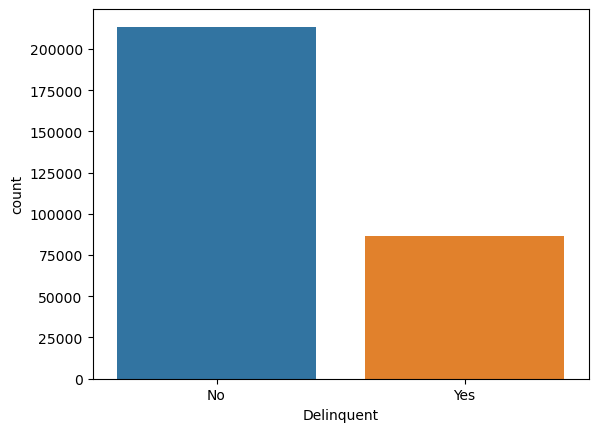

In [90]:
sns.countplot(x='Delinquent', data=df4)

<Axes: xlabel='Delinquent', ylabel='count'>

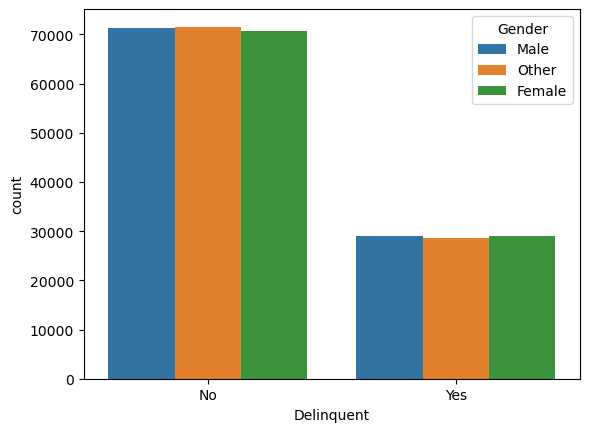

In [91]:
sns.countplot(x='Delinquent', hue='Gender', data=df4)

<Axes: xlabel='Delinquent', ylabel='count'>

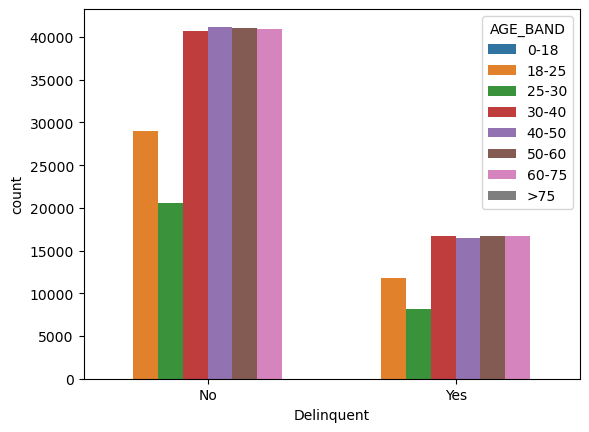

In [92]:
sns.countplot(x='Delinquent', hue='AGE_BAND', data=df4)

<Axes: xlabel='Delinquent', ylabel='count'>

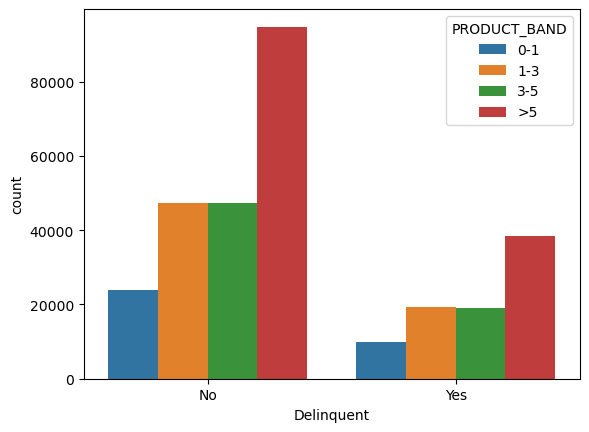

In [93]:
sns.countplot(x='Delinquent', hue='PRODUCT_BAND', data=df4)

<Axes: xlabel='Delinquent', ylabel='count'>

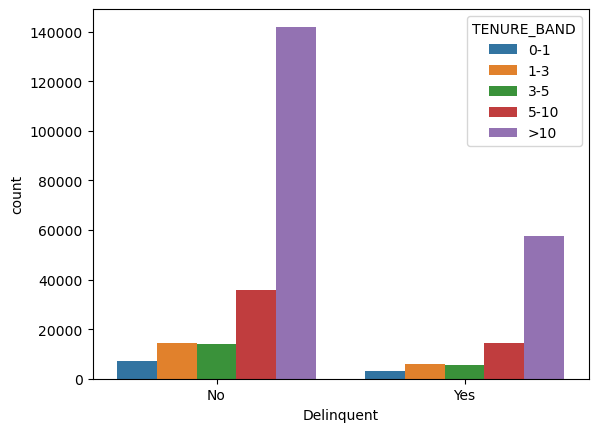

In [94]:
sns.countplot(x='Delinquent', hue='TENURE_BAND', data=df4)

<Axes: xlabel='Delinquent', ylabel='count'>

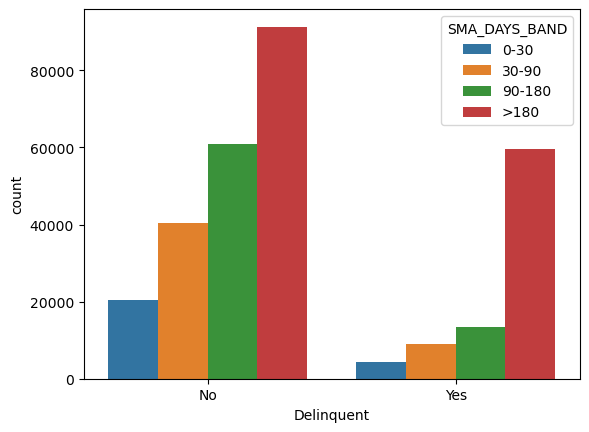

In [95]:
sns.countplot(x='Delinquent', hue='SMA_DAYS_BAND', data=df4)

In [96]:
df4.to_csv("processed_data.csv",index=False)

In [99]:
df4.describe

<bound method NDFrame.describe of               Age   Customer_Type  Gender    Location         Income  \
0       46.538302      Individual    Male  Semi Urban  278129.258117   
1       55.189847  Non Individual   Other       Rural  377120.106856   
2       49.343696  Non Individual   Other  Semi Urban  551264.153645   
3       46.333926      Individual   Other  Semi Urban  364907.966530   
4       40.030050      Individual    Male       Rural  341452.607669   
...           ...             ...     ...         ...            ...   
299995  38.658010  Non Individual   Other  Semi Urban  545587.829640   
299996  35.899002      Individual  Female       Metro  504312.309031   
299997  50.124111      Individual    Male       Rural  537026.632529   
299998  35.468797  Non Individual  Female       Urban  914308.061198   
299999  48.127859      Individual  Female       Metro  328323.738966   

          Occupation Type_of_Profession  Credit_Score  Number_of_Products  \
0       Non Salaried    

In [101]:
df5=pd.DataFrame(df4)

df5['Delinquent'] = df5['Delinquent'].replace({'Yes':1,'No':0})

In [122]:


feature,target = 'AGE_BAND','Delinquent'
df_woe_iv = (pd.crosstab(df5[feature],df5[target],
                      normalize='columns')
             .assign(woe=lambda df5x: np.log(df5x[1] / df5x[0]))
             .assign(iv=lambda df5x: np.sum(df5x['woe']*
                                           (df5x[1]-df5x[0]))))
